In [1]:

# import necessary packages 

import sys
import os
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# giving the path of dcm images
path = "/home/yosagaf/devs/medical-biometrics/assignement1/data/"
    
# let's create a slices list containing a collectiong 
# the dicom images on a python list passing 
CT_images = os.listdir(path)
print(CT_images)

slices = [dicom.read_file(path+"/"+s, force=True) for s in CT_images]
slices = sorted(slices, key=lambda x:x.ImagePositionPatient[2])    

['SCD2001_MR_204.dcm', 'SCD2001_MR_214.dcm', 'SCD2001_MR_218.dcm', 'SCD2001_MR_213.dcm', 'test.dcm', 'SCD2001_MR_215.dcm', 'SCD2001_MR_206.dcm', 'SCD2001_MR_208.dcm', 'SCD2001_MR_203.dcm', 'SCD2001_MR_212.dcm', 'SCD2001_MR_201.dcm', 'SCD2001_MR_217.dcm', 'SCD2001_MR_202.dcm', 'SCD2001_MR_207.dcm', 'SCD2001_MR_210.dcm', 'SCD2001_MR_219.dcm', 'SCD2001_MR_211.dcm', 'SCD2001_MR_205.dcm', 'SCD2001_MR_209.dcm', 'SCD2001_MR_216.dcm', 'SCD2001_MR_220.dcm']


In [ ]:
#vol = imageio.volread(dirname, 'DICOM')

In [4]:
image_shape = []
image_shape.append(len(slices))
image_shape.extend(list(slices[0].pixel_array.shape))
    
print(image_shape)
volume3d = np.zeros(image_shape)

for i, s in enumerate(slices):
    array2d = s.pixel_array
    volume3d[i:,:,] = array2d

print("Array 2D shape        :", array2d.shape)
print("Volume 3D shape       :", volume3d.shape)

[21, 256, 256]
Array 2D shape        : (256, 256)
Volume 3D shape       : (21, 256, 256)


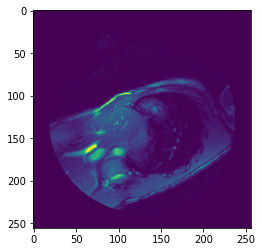

In [5]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

multi_slice_viewer(volume3d)
plt.show()

In [ ]:
import imageio
import matplotlib.pyplot as plt

gif_path = "test.gif"

n = len(slices)
plt.figure(figsize=(4,4))
for i, x in enumerate(range(len(slices))):
    plt.scatter(x/n, x/n)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.savefig(.format(i=i))

with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i)))